## Step 1: Import Libraries and Load Data

In [1]:
# ImportING necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Displaying basic information about each dataset
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

## Step 2: Data Cleaning and Preprocessing
### 1.Check for Missing Values:

In [2]:
# Check for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### 2. Handle Duplicates:

In [3]:
# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


### 3. Convert Date Columns:

In [4]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


## Step 3: Individual Dataset Analysis
### Customers Dataset:

/var/folders/bt/_x6ltt7j29sg2235dwlkz6n40000gp/T/ipykernel_69254/2630031747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


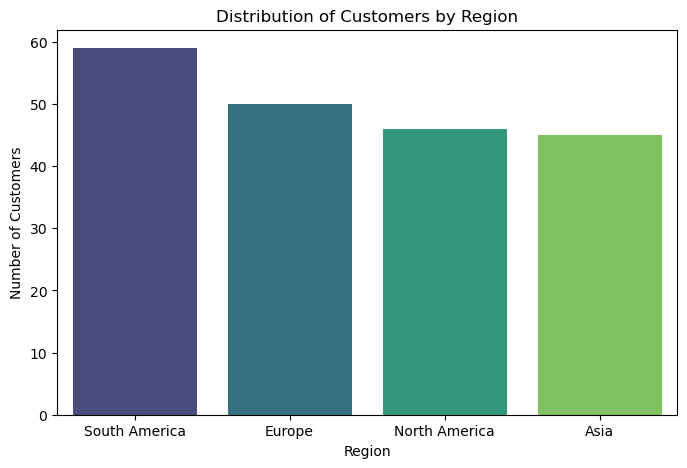

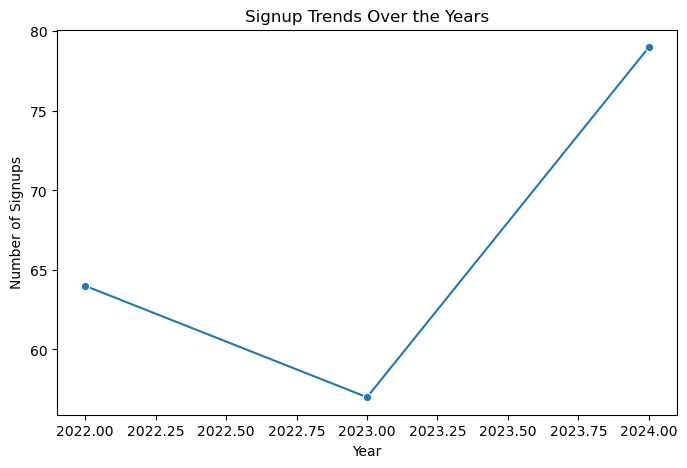

In [5]:
# Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Distribution of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Signup trends
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o")
plt.title("Signup Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


### Products Dataset:

/var/folders/bt/_x6ltt7j29sg2235dwlkz6n40000gp/T/ipykernel_69254/980753888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")


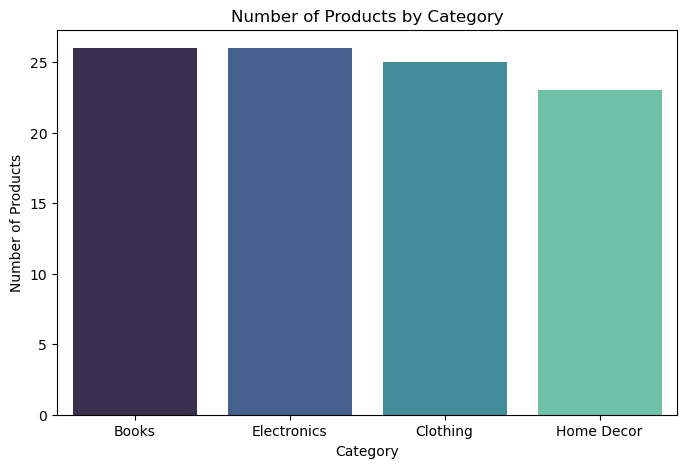

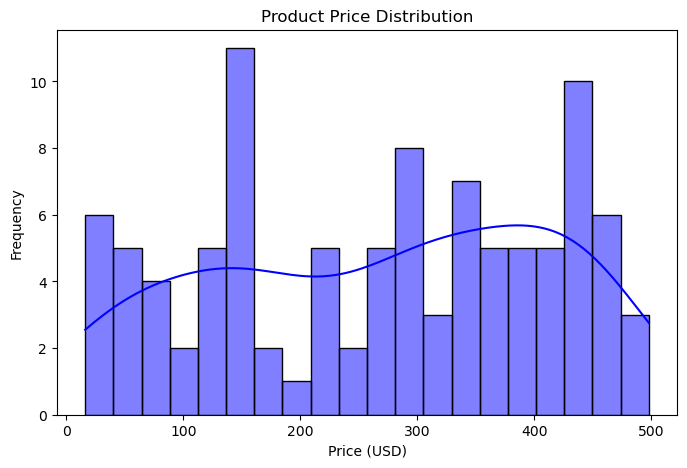

In [6]:
# Product category distribution
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color="blue")
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


### Transactions Dataset:

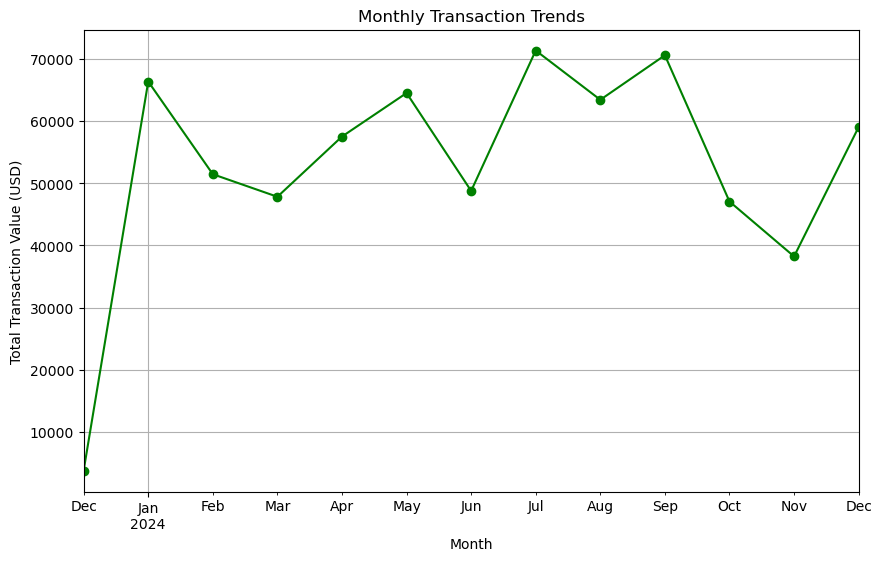

/var/folders/bt/_x6ltt7j29sg2235dwlkz6n40000gp/T/ipykernel_69254/3637573462.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="plasma")


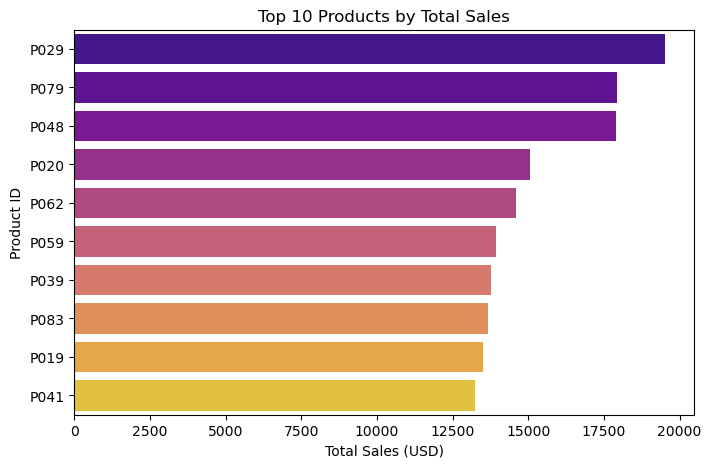

In [7]:
# Monthly transaction trends
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_trends = transactions.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='green')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Value (USD)")
plt.grid()
plt.show()

# Top 10 products by sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="plasma")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product ID")
plt.show()


## Step 4: Merge and Explore Relationships

/var/folders/bt/_x6ltt7j29sg2235dwlkz6n40000gp/T/ipykernel_69254/2701905983.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="coolwarm")


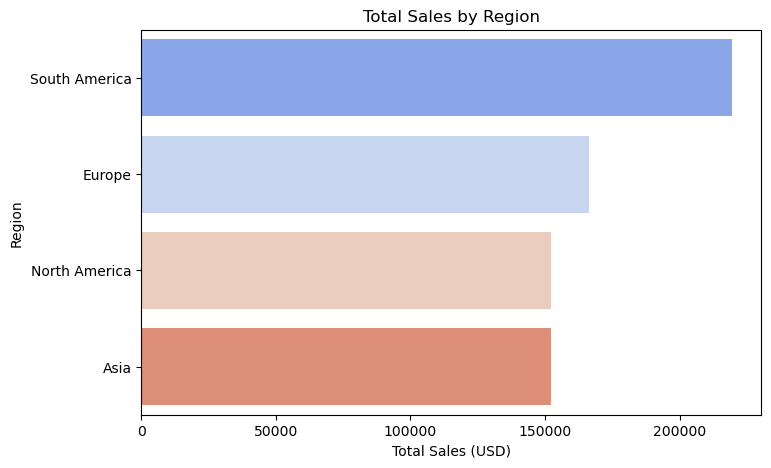

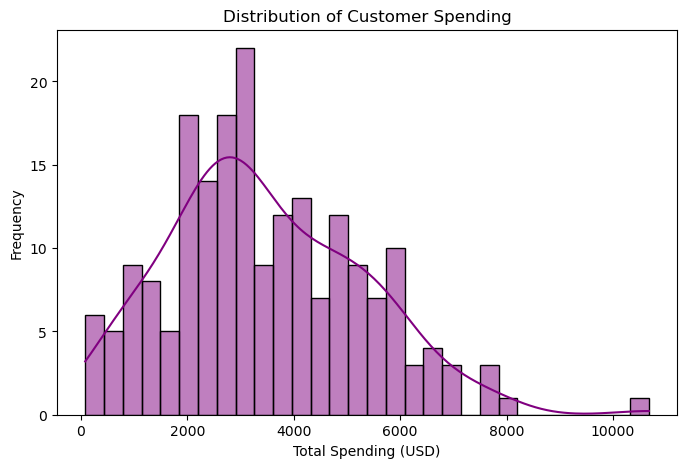

In [8]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Region-wise sales
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette="coolwarm")
plt.title("Total Sales by Region")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Region")
plt.show()

# Customer purchase behavior
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.histplot(customer_spending, bins=30, kde=True, color="purple")
plt.title("Distribution of Customer Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Frequency")
plt.show()


## Insights

Customer Distribution by Region:
South America has the highest number of customers among all regions, indicating strong market penetration there. However, regions like Asia and North America have fewer customers, presenting potential growth opportunities through targeted marketing strategies.

Signup Trends Over the Years:
A noticeable dip in signups occurred in 2023, followed by a significant recovery in 2024. This trend suggests external factors may have impacted customer acquisition in 2023. Businesses can investigate and address these factors to ensure consistent growth.

Product Categories:
Books, Electronics, and Clothing categories dominate the product portfolio, each contributing equally to the inventory. Home Decor has slightly fewer products, suggesting an opportunity to expand in this category to cater to diverse customer preferences.

Product Price Distribution:
Products are priced across a wide range, with peaks observed around $100, $300, and $400. This distribution indicates diverse pricing strategies to target different customer segments effectively. A higher focus on the most frequent price points can optimize sales.

Market Opportunities:
The combination of uneven regional distribution and pricing trends presents opportunities to increase customer reach and boost sales by strategically expanding into underperforming regions and focusing on competitive pricing in high-demand ranges.







